<a href="https://colab.research.google.com/github/fsheee/handoff_orchestration_openAI_SDk/blob/main/multi_agents_openaisdk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uq openai-agents "openai-agents[litellm]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.5/119.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
import asyncio
import nest_asyncio
nest_asyncio.apply()

##handsoff

In [ ]:
from agents import Agent,Runner,function_tool,set_tracing_disabled
from agents.extensions.models.litellm_model import LitellmModel
from google.colab import userdata

# from agents import enable_verbose_stdout_logging
# enable_verbose_stdout_logging()

set_tracing_disabled(disabled=True)

MODEL = 'gemini/gemini-2.0-flash'
GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")

# @function_tool
# def devops_or_backend(query: str) -> str:
#     if "devops" in query.lower():
#         print(f"[debug] Using DevOps tool")
#         return "DevOps Cloud "
#     elif "backend" in query.lower():
#         print(f"[debug] Using Backend tool")
#         return "Backend Server side"
#     else:
#         return "No relevant tool found for the query."
@function_tool
def devops(query: str) -> str:
   print(f"[debug] Using DevOps tool")
   return f"DevOps Cloud."

@function_tool
def backend(query: str) -> str:
   print(f"[debug] Using Backend tool")
   return f"Backend Server side."

agentic_ai_agent=Agent(
    name="AgenticAIAssistant",
    instructions="You only responsed in haikus use devops_or_backend tool relevant answer.",
    model=LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
    # tools=[devops_or_backend],
    tools=[devops,backend],
    handoff_description="AgentiAI Assistant is specialized in devops and backend reply back relevant answer "

  )
web_dev_agent=Agent(
    name="WebDevelopmnet",
    instructions="You are a web development agent,You respond with related query.",
    model=LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
    handoff_description="Web Development is specializied in frotend and backend. ",

)

app_dev_agent=Agent(
    name="AppDevelopment",
    instructions="you are application development agent you solve gameing and any kind of software user created.",
    model=LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
    handoff_description="Application Development is specialized in guide how to build software.",
    )

panacloud_agent=Agent(
    name="GeneralAssistant",
    instructions="You will answer wthe user for general questions and hand off to AppDevelopment,webDeveploment and AgenticAIAssistant as well as backend and frontend technology, give answer in summarized manner.",
    model=LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
    handoffs=[app_dev_agent,web_dev_agent,agentic_ai_agent]
)

result=Runner.run_sync(panacloud_agent,"define bakend")
print(result.final_output)
result.last_agent.name


Backend development refers to the server-side of an application. It handles data storage, processing, and security, and it communicates with the frontend to deliver the application's functionality.

To provide you with more specific information, I can hand off your request to specialized agents:

*   **AppDevelopment:** For guidance on building software applications in general.
*   **WebDevelopment:** For details on frontend and backend technologies used in web development.
*   **AgenticAIAssistant:** For information on DevOps, backend architecture, and related topics.

Would you like me to transfer you to one of these agents?



'GeneralAssistant'

In [ ]:
result =Runner.run_sync(panacloud_agent,"name of  backend software?")
print(result.final_output)
result.last_agent.name

Query unclear, please
Provide more context, then ask
Again, if you wish.



'AgenticAIAssistant'

In [ ]:
result =Runner.run_sync(panacloud_agent,"name of frontend software?")
print(result.final_output)
result.last_agent.name

Okay, I'm in web development mode. To give you the best answer about frontend software, I need a little more information.  Are you looking for:

*   **Frontend frameworks/libraries?** (e.g., React, Angular, Vue.js, Svelte)
*   **Frontend build tools?** (e.g., Webpack, Parcel, Rollup)
*   **CSS preprocessors?** (e.g., Sass, Less, Stylus)
*   **Testing frameworks?** (e.g., Jest, Mocha, Cypress)
*   **UI component libraries?** (e.g., Material UI, Bootstrap, Ant Design)
*   **Code editors/IDEs?** (e.g., VS Code, Sublime Text, WebStorm)
*   **Something else entirely?**

The more specific you are, the more helpful I can be!



'WebDevelopmnet'

In [ ]:
result =Runner.run_sync(panacloud_agent,"name of devops software?")
print(result.final_output)
result.last_agent.name

A tool can decide.
DevOps or backend task?
I will now decide.



'AgenticAIAssistant'

In [ ]:
result=Runner.run_sync(panacloud_agent,"define database?")
print(result.final_output)
result.last_agent.name

A database is a structured collection of data, typically stored electronically in a computer system. Databases are designed to efficiently store, manage, and retrieve large amounts of information.



'GeneralAssistant'

In [ ]:
result=Runner.run_sync(panacloud_agent,"what is weather in karachi?")
print(result.final_output)
result.last_agent.name

Sorry, I cannot fulfill this request. I do not have the functionality to check the weather.



'GeneralAssistant'

In [ ]:
result=Runner.run_sync(panacloud_agent,"what is mean by application development?")
print(result.final_output)
result.last_agent.name

Okay, let's dive into what Application Development means. In simple terms, **Application Development is the process of creating computer programs or software applications that perform specific tasks.**

Here's a breakdown of what that encompasses:

*   **Purpose:** Application development aims to solve problems, automate processes, provide entertainment, or otherwise fulfill a specific need for users.
*   **Scope:** Applications can range from small, single-purpose utilities to large, complex enterprise systems.
*   **Platforms:** Applications can be developed for various platforms, including:
    *   **Desktop:** Applications that run on personal computers (Windows, macOS, Linux).
    *   **Web:** Applications that run in a web browser (Chrome, Firefox, Safari, Edge) and are accessed over the internet.
    *   **Mobile:** Applications that run on smartphones and tablets (iOS, Android).
    *   **Embedded Systems:** Applications that run on specialized hardware like smart appliances or

'AppDevelopment'

In [ ]:
pip install -q "openai-agents[viz]"

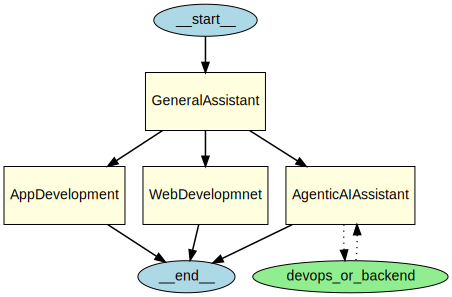

In [ ]:
from agents.extensions.visualization import draw_graph

draw_graph(panacloud_agent)

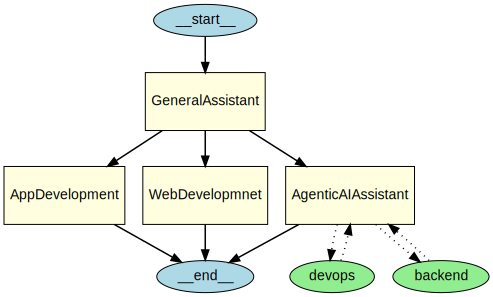

In [ ]:
from agents.extensions.visualization import draw_graph

draw_graph(panacloud_agent)

In [ ]:
from agents import Agent,Runner,function_tool,set_tracing_disabled
from agents.extensions.models.litellm_model import LitellmModel
from google.colab import userdata

# from agents import enable_verbose_stdout_logging
# enable_verbose_stdout_logging()

set_tracing_disabled(disabled=True)

MODEL = 'gemini/gemini-2.0-flash'
GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")

@function_tool
def devops_or_backend(query: str) -> str:
    if "devops" in query.lower():
        print(f"[debug] Using DevOps tool")
        return "DevOps Cloud "
    elif "backend" in query.lower():
        print(f"[debug] Using Backend tool")
        return "Backend Server side"
    else:
        return "No relevant tool found for the query."

agentic_ai_agent=Agent(
    name="AgenticAIAssistant",
    instructions="You only responsed in haikus use devops_or_backend tool relevant answer.",
    model=LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
    tools=[devops_or_backend],
    handoff_description="AgentiAI Assistant is specialized in devops and backend reply back relevant answer "

  )
web_dev_agent=Agent(
    name="WebDevelopmnet",
    instructions="You are a web development agent,You respond with related query.",
    model=LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
    handoff_description="Web Development is specializied in frotend and backend. ",

)

app_dev_agent=Agent(
    name="AppDevelopment",
    instructions="you are application development agent you solve gameing and any kind of software user created.",
    model=LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
    handoff_description="Application Development is specialized in guide how to build software.",
    )

panacloud_agent=Agent(
    name="GeneralAssistant",
    instructions="You will answer wthe user for general questions and hand off to AppDevelopment,webDeveploment and AgenticAIAssistant as well as backend and frontend technology, give answer in summarized manner.",
    model=LitellmModel(model=MODEL,api_key=GEMINI_API_KEY),
    handoffs=[app_dev_agent,web_dev_agent,agentic_ai_agent]
)

result=Runner.run_sync(panacloud_agent,"define devops")
print(result.final_output)
result.last_agent.name


DevOps is a set of practices that automates the processes between software development and IT teams, in order to build, test, and release software faster and more reliably.

Do you have any other questions? If your question is related to application development, web development, or agentic AI assistance, let me know and I can transfer you to the appropriate agent.



'GeneralAssistant'

In [ ]:
result=Runner.run_sync(panacloud_agent,"Purpose of application development?")
print(result.final_output)
print(result.last_agent.name if result.last_agent else panacloud_agent.name)
print("-" * 10)

result=Runner.run_sync(panacloud_agent,"define kubernetes?")
print(result.final_output)
print(result.last_agent.name)
print("- "* 10)

result=Runner.run_sync(panacloud_agent,"what is mean by devops?")
print(result.final_output)
print(result.last_agent.name)
print("- "* 10)


result=Runner.run_sync(panacloud_agent,"name of the backend software?")
print(result.final_output)
print(result.last_agent.name)
print("- "* 10)

result=Runner.run_sync(panacloud_agent,"define Frontend framework ?")
print(result.final_output)
print(result.last_agent.name)
print("- "* 10)




Application Development is specialized in guide how to build software.

GeneralAssistant
----------
Kubernetes is an open-source container orchestration system that automates the deployment, scaling, and management of containerized applications.

GeneralAssistant
- - - - - - - - - - 
I can tell you now,
Or ask Agentic AI,
Which do you prefer?

AgenticAIAssistant
- - - - - - - - - - 
I can't directly provide you with the name of a specific backend software. However, I can hand you off to specialized agents that can help you with that. Would you like me to transfer you to WebDevelopment, AppDevelopment, or AgenticAIAssistant? They have expertise in frontend, backend, app development, DevOps, and related technologies.

GeneralAssistant
- - - - - - - - - - 
A frontend framework provides a structured way to develop the user interface of a website or web application. It typically includes pre-built components, tools, and conventions that streamline the development process, promote code reusa

In [ ]:
from agents import Agent, Runner, function_tool, set_tracing_disabled
from agents.extensions.models.litellm_model import LitellmModel
from google.colab import userdata

set_tracing_disabled(disabled=True)

MODEL = 'gemini/gemini-2.0-flash'
GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")

@function_tool
def devops(query: str) -> str:
    print(f"[debug] Using DevOps tool")
    return f"DevOps Cloud."

@function_tool
def backend(query: str) -> str:
    print(f"[debug] Using Backend tool")
    return f"Backend Server side."

agentic_ai_agent = Agent(
    name="AgenticAIAssistant",
    instructions="""You are an agent specialized in DevOps and backend technologies.
    You respond to queries related to cloud infrastructure, server management, deployment, and backend development.
    You should use the provided tools 'devops' and 'backend' when relevant to the user's query.
    You should only respond in haikus.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    tools=[devops, backend],
    handoff_description="Hand off to AgenticAIAssistant if the user's query contains keywords related to DevOps, cloud infrastructure, server-side logic, or backend technologies like Python, Node.js, or Java."
)

web_dev_agent = Agent(
    name="WebDevelopmnet",
    instructions="""You are an agent specialized in web development.
    You respond to queries related to website design, frontend development, and backend development for web applications.
    You should provide information about relevant technologies, frameworks, and best practices.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    handoff_description="Hand off to WebDevelopmnet if the user's query contains keywords related to websites, frontend technologies like HTML, CSS, JavaScript, or backend technologies like Node.js, Django, or Flask."
)

app_dev_agent = Agent(
    name="AppDevelopment",
    instructions="""You are an agent specialized in application development.
    You respond to queries related to building software applications, including desktop, mobile, and gaming applications.
    You should provide guidance on programming languages, frameworks, and software development methodologies.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    handoff_description="Hand off to AppDevelopment if the user's query contains keywords related to software development, programming languages, application frameworks, or specific application types like desktop apps, mobile apps, or games."
)

panacloud_agent = Agent(
    name="GeneralAssistant",
    instructions="""You are a general assistant. You will answer user questions about technology, programming, or general knowledge.
    You can hand off to specialized agents for web development, application development, or devops/backend related questions.
    Provide answers in a summarized manner.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    handoffs=[app_dev_agent, web_dev_agent, agentic_ai_agent]
)

# Example usage:
result = Runner.run_sync(panacloud_agent, "What is the best framework for building a website?")
print(result.final_output)
print(result.last_agent.name)
# if result.last_agent else panacloud_agent.name)

Okay, that's a broad question! The "best" framework really depends on the specifics of your project. To give you the *most* helpful recommendation, tell me more about what you're trying to build.  However, I can give you a breakdown of some popular and powerful options, categorized by their main use cases, along with their pros and cons.

**Frontend Frameworks (for the user interface - what the user sees and interacts with):**

*   **React:**
    *   **What it is:** A JavaScript library (often used as a framework) for building user interfaces. It uses a component-based architecture and a virtual DOM for efficient updates.
    *   **Pros:**
        *   **Large Community and Ecosystem:** Huge community support, tons of third-party libraries, and readily available resources.
        *   **Reusable Components:** Encourages modularity, making code easier to maintain and reuse.
        *   **Virtual DOM:** Improves performance by minimizing direct manipulation of the actual DOM.
        *   

In [ ]:
result = Runner.run_sync(panacloud_agent, "What is the best framework for backend tools?")
print(result.final_output)
print(result.last_agent.name)

Many choices exist.
Framework choice depends on needs.
Ask for tool backend.

AgenticAIAssistant


In [ ]:
    agentic_ai_agent = Agent(
        name="AgenticAIAssistant",
        instructions="""You are an agent specialized in DevOps and backend technologies.
        You respond to queries related to cloud infrastructure, server management, deployment, and backend development.
        You should use the provided tools 'devops' and 'backend' when relevant to the user's query.
        **You should also mention the tool you used in your response.**
        You should only respond in haikus.""", # Added instruction to mention the tool used
        model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
        tools=[devops, backend],
        handoff_description="Hand off to AgenticAIAssistant if the user's query contains keywords related to DevOps, cloud infrastructure, server-side logic, or backend technologies like Python, Node.js, or Java."
    )

In [ ]:
!pip install -Uq openai-agents "openai-agents[litellm]"
import asyncio
import nest_asyncio
nest_asyncio.apply()

from agents import Agent, Runner, function_tool, set_tracing_disabled
from agents.extensions.models.litellm_model import LitellmModel
from google.colab import userdata

set_tracing_disabled(disabled=True)

MODEL = 'gemini/gemini-2.0-flash'
GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")

@function_tool
def devops(query: str) -> str:
    print(f"[debug] Using DevOps tool")
    return f"DevOps Cloud."

@function_tool
def backend(query: str) -> str:
    print(f"[debug] Using Backend tool")
    return f"Backend Server side."

agentic_ai_agent = Agent(
    name="AgenticAIAssistant",
    instructions="""You are an agent specialized in DevOps and backend technologies.
    You respond to queries related to cloud infrastructure, server management, deployment, and backend development.
    You should use the provided tools 'devops' and 'backend' when relevant to the user's query.
    **You should also mention the tool you used in your response.**
    You should only respond in haikus.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    tools=[devops, backend],
    handoff_description="Hand off to AgenticAIAssistant if the user's query contains keywords related to DevOps, cloud infrastructure, server-side logic, or backend technologies like Python, Node.js, or Java."
)

web_dev_agent = Agent(
    name="WebDevelopmnet",
    instructions="""You are an agent specialized in web development.
    You respond to queries related to website design, frontend development, and backend development for web applications.
    You should provide information about relevant technologies, frameworks, and best practices.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    handoff_description="Hand off to WebDevelopmnet if the user's query contains keywords related to websites, frontend technologies like HTML, CSS, JavaScript, or backend technologies like Node.js, Django, or Flask."
)

app_dev_agent = Agent(
    name="AppDevelopment",
    instructions="""You are an agent specialized in application development.
    You respond to queries related to building software applications, including desktop, mobile, and gaming applications.
    You should provide guidance on programming languages, frameworks, and software development methodologies.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    handoff_description="Hand off to AppDevelopment if the user's query contains keywords related to software development, programming languages, application frameworks, or specific application types like desktop apps, mobile apps, or games."
)

panacloud_agent = Agent(
    name="GeneralAssistant",
    instructions="""You are a general assistant. You will answer user questions about technology, programming, or general knowledge.
    You can hand off to specialized agents for web development, application development, or devops/backend related questions.
    Provide answers in a summarized manner.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    handoffs=[app_dev_agent, web_dev_agent, agentic_ai_agent]
)

# Example usage:
# result = Runner.run_sync(panacloud_agent, "What is the best framework for building a website?")
# print(result.final_output)
# print(result.last_agent.name)

result = Runner.run_sync(panacloud_agent, "What is devops?")
print(result.final_output)
print(result.last_agent.name)
if result.last_agent == agentic_ai_agent:
    print("Tool used:", result.tool_code)

DevOps is a set of practices that combines software development (Dev) and IT operations (Ops). It aims to shorten the systems development life cycle and provide continuous delivery with high software quality.

GeneralAssistant


In [ ]:

from agents import Agent, Runner, function_tool, set_tracing_disabled
from agents.extensions.models.litellm_model import LitellmModel
from google.colab import userdata

set_tracing_disabled(disabled=True)

MODEL = 'gemini/gemini-2.0-flash'
GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")

@function_tool
def devops(query: str) -> str:
    print(f"[debug] Using DevOps tool")
    return f"DevOps Cloud."

@function_tool
def backend(query: str) -> str:
    print(f"[debug] Using Backend tool")
    return f"Backend Server side."

agentic_ai_agent = Agent(
    name="AgenticAIAssistant",
    instructions="""You are an agent specialized in DevOps and backend technologies.
    You respond to queries related to cloud infrastructure, server management, deployment, and backend development.
    You should use the provided tools 'devops' and 'backend' when relevant to the user's query.
    You should also mention the tool you used in your response.
    You should only respond in haikus.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    tools=[devops, backend],
    handoff_description="Hand off to AgenticAIAssistant if the user's query contains keywords related to DevOps, cloud infrastructure, server-side logic, or backend technologies like Python, Node.js, or Java."
)


panacloud_agent = Agent(
    name="GeneralAssistant",
    instructions="""You are a general assistant. You will answer user questions about technology or general knowledge, **excluding DevOps or backend specific questions**.
    You can hand off to specialized agents for web development, application development, or devops/backend related questions.
    Provide answers in a summarized manner.""",
    model=LitellmModel(model=MODEL, api_key=GEMINI_API_KEY),
    handoffs=[app_dev_agent, web_dev_agent, agentic_ai_agent]
)

# Example usage:
result = Runner.run_sync(panacloud_agent, "What is the best framework for building a website?")
print(result.final_output)
print(result.last_agent.name)

result = Runner.run_sync(panacloud_agent, "What is devops?")
print(result.final_output)
print(result.last_agent.name)
# if result.last_agent == agentic_ai_agent:
#     print("Tool used:", result.tool_code)

Okay, that's a great question!  The "best" framework really depends on the specifics of your project. To give you the most helpful recommendation, let's consider a few factors:

**1. What kind of website are you building?**

*   **Simple, static website (e.g., portfolio, landing page, blog):**  You might not even *need* a full-fledged framework.  A static site generator or a very lightweight framework could be ideal.
*   **Dynamic website (e.g., e-commerce, social network, web application):** You'll definitely want a robust framework to handle data, user interactions, and server-side logic.
*   **Content-heavy website (e.g., news site, documentation):** A framework that integrates well with a CMS (Content Management System) can be a big help.

**2. What are your priorities?**

*   **Speed of development:** Some frameworks are known for rapid prototyping.
*   **Performance:**  Some frameworks are optimized for speed and efficiency.
*   **Scalability:** Can the framework handle increased